In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


DIRECTORY = r'C:\Users\vikas\Desktop\ML\Dataset'
CATEGORIES = ["WITHOUT_CANCER", "WITH_CANCER"]


data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)
        #print(labels)
       


lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
data = np.array(data,dtype = 'float32')
labels = np.array(labels)
#print(labels)
#print(data)

(trainX , testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=0)




aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
detector =  Sequential()
detector.add(Conv2D(64,(3,3),input_shape = (224,224,3), activation='relu'))
detector.add(Conv2D(64,(3,3),activation='relu'))
detector.add(MaxPooling2D(pool_size = (2,2)))
detector.add(Flatten())
detector.add(Dense(units=128,activation='relu'))
detector.add(Dense(units=2,activation='softmax'))
detector.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

H = detector.fit(aug.flow(trainX, trainY,batch_size = 16),steps_per_epoch = len(trainX)//16,validation_data=(testX, testY),validation_steps=len(testX),epochs=10)









Epoch 1/10
17/17 [==============================] - 78s 5s/step - loss: 572.1772 - accuracy: 0.6783 - val_loss: 5.2414 - val_accuracy: 0.4348
Epoch 2/10
17/17 [==============================] - 76s 4s/step - loss: 0.9878 - accuracy: 0.7093 - val_loss: 0.5824 - val_accuracy: 0.7536
Epoch 3/10
17/17 [==============================] - 75s 4s/step - loss: 0.3006 - accuracy: 0.9225 - val_loss: 0.3602 - val_accuracy: 0.8986
Epoch 4/10
17/17 [==============================] - 78s 5s/step - loss: 0.2229 - accuracy: 0.9341 - val_loss: 0.3045 - val_accuracy: 0.9130
Epoch 5/10
17/17 [==============================] - 80s 5s/step - loss: 0.1692 - accuracy: 0.9496 - val_loss: 0.3539 - val_accuracy: 0.9130
Epoch 6/10
17/17 [==============================] - 79s 5s/step - loss: 0.2065 - accuracy: 0.9302 - val_loss: 0.3297 - val_accuracy: 0.9130
Epoch 7/10
17/17 [==============================] - 79s 5s/step - loss: 0.1742 - accuracy: 0.9380 - val_loss: 0.2643 - val_accuracy: 0.9130
Epoch 8/10
17/17 [

In [9]:
# detector.save(r'C:\Users\vikas\Desktop\ML\LCD1')

INFO:tensorflow:Assets written to: C:\Users\vikas\Desktop\ML\LCD1\assets


                precision    recall  f1-score   support

WITHOUT_CANCER       0.83      1.00      0.91        30
   WITH_CANCER       1.00      0.85      0.92        39

      accuracy                           0.91        69
     macro avg       0.92      0.92      0.91        69
  weighted avg       0.93      0.91      0.91        69



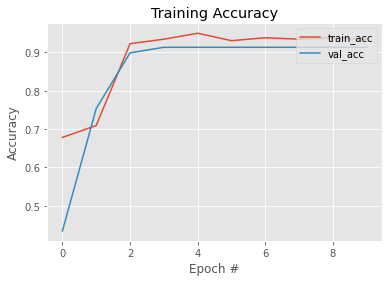

In [2]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")

predIdxs = detector.predict(testX, batch_size=16)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))